In [1]:
# Imports!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [11]:
# loading!!
model_ready_selected = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_clean/model_ready_selected.csv')
model_ready_selected = pd.get_dummies(model_ready_selected, columns=['current_club_domestic_competition_id'], drop_first=True)

In [12]:
# inspecting!!
model_ready_selected.columns

Index(['age', 'minutes_played', 'goals_per90', 'assists_per90', 'position',
       'last_season', 'country_of_citizenship', 'market_value_in_eur',
       'target_log', 'current_club_domestic_competition_id_DK1',
       'current_club_domestic_competition_id_ES1',
       'current_club_domestic_competition_id_FR1',
       'current_club_domestic_competition_id_GB1',
       'current_club_domestic_competition_id_GR1',
       'current_club_domestic_competition_id_IT1',
       'current_club_domestic_competition_id_L1',
       'current_club_domestic_competition_id_NL1',
       'current_club_domestic_competition_id_PO1',
       'current_club_domestic_competition_id_RU1',
       'current_club_domestic_competition_id_SC1',
       'current_club_domestic_competition_id_TR1',
       'current_club_domestic_competition_id_UKR1'],
      dtype='object')

In [39]:
# these are our selected features for the model (literally all our columns btw)!!
selected_features = [
    'age',
    'position',
    'goals_per90',
    'assists_per90',
    'last_season',
    'country_of_citizenship',
    'current_club_domestic_competition_id_DK1',
    'current_club_domestic_competition_id_ES1',
    'current_club_domestic_competition_id_FR1',
    'current_club_domestic_competition_id_GB1',
    'current_club_domestic_competition_id_GR1',
    'current_club_domestic_competition_id_IT1',
    'current_club_domestic_competition_id_L1',
    'current_club_domestic_competition_id_NL1',
    'current_club_domestic_competition_id_PO1',
    'current_club_domestic_competition_id_RU1',
    'current_club_domestic_competition_id_SC1',
    'current_club_domestic_competition_id_TR1',
    'current_club_domestic_competition_id_UKR1'
]

In [40]:
# defining our  X and y!!
X = model_ready_selected[selected_features]
y = model_ready_selected['target_log']

# Split train/test things for our model!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (22769, 19), Test shape: (5693, 19)


# Main part of our model is below!!

In [41]:
# One-hot encode 'position' and 'country_of_citizenship' columns in train and test sets
X_train_encoded = pd.get_dummies(X_train, columns=['position', 'country_of_citizenship'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['position', 'country_of_citizenship'], drop_first=True)

# Align columns in train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_encoded, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
# predicting things!!
y_pred = rf.predict(X_test_encoded)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.7453
RMSE: 0.9750
R² Score: 0.6230


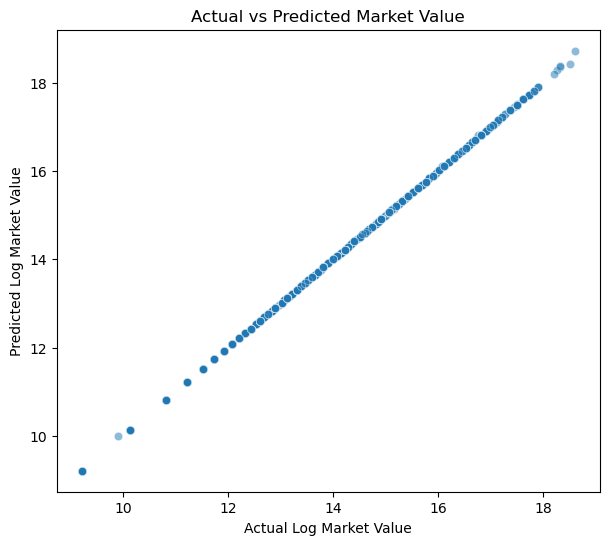

In [38]:
# plotting the accuracy between predicted and actual market value!!
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Log Market Value")
plt.ylabel("Predicted Log Market Value")
plt.title("Actual vs Predicted Market Value")
plt.show()

In [26]:
cv_scores = cross_val_score(rf, X_train_encoded, y_train, cv=5, scoring='r2', error_score="raise")
print("Cross-Validation R² Scores:", cv_scores)
mean_cv = np.mean(cv_scores)
print("Mean CV R²:", mean_cv)
if mean_cv < 0.5:
    raise Exception("Model R² score is below acceptable threshold.")

Cross-Validation R² Scores: [0.99999539 0.99999957 0.99999901 0.999998   0.99999619]
Mean CV R²: 0.9999976324064338
